In [23]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

In [24]:
def simulate_lorenz_system(sigma, rho, beta, init_state, time_points):
    def lorenz_system(t, state, sigma, rho, beta):
        x, y, z = state
        d_vec = [
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ]
        return d_vec

    sol = solve_ivp(lorenz_system, [time_points[0], time_points[-1]], init_state, args=(sigma, rho, beta), t_eval=time_points)
    x, y, z = sol.y
    return x, y, z

# Lorenz Attractor

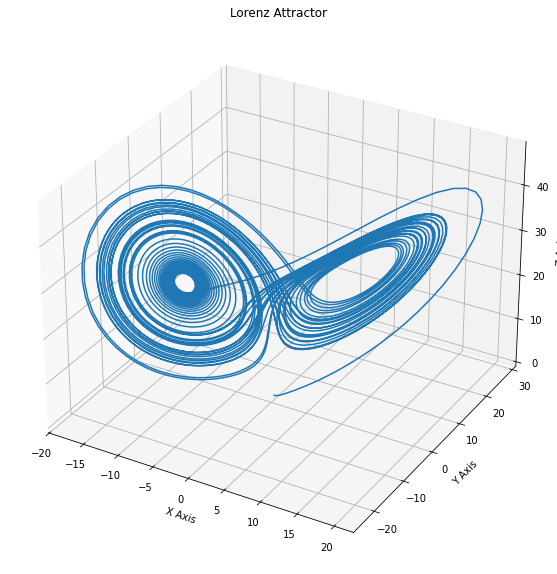

In [25]:
sigma = 10
rho = 28
beta = 8/3
init_state = [0, 1, 0]
time_points = np.linspace(0, 50, 5001)

x, y, z = simulate_lorenz_system(sigma, rho, beta, init_state, time_points)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10,10))
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Lorenz Attractor')
ax.plot(x, y, z)
plt.savefig("figures/lorenz_attractor_3d.png", transparent=True, bbox_inches='tight')
plt.show()

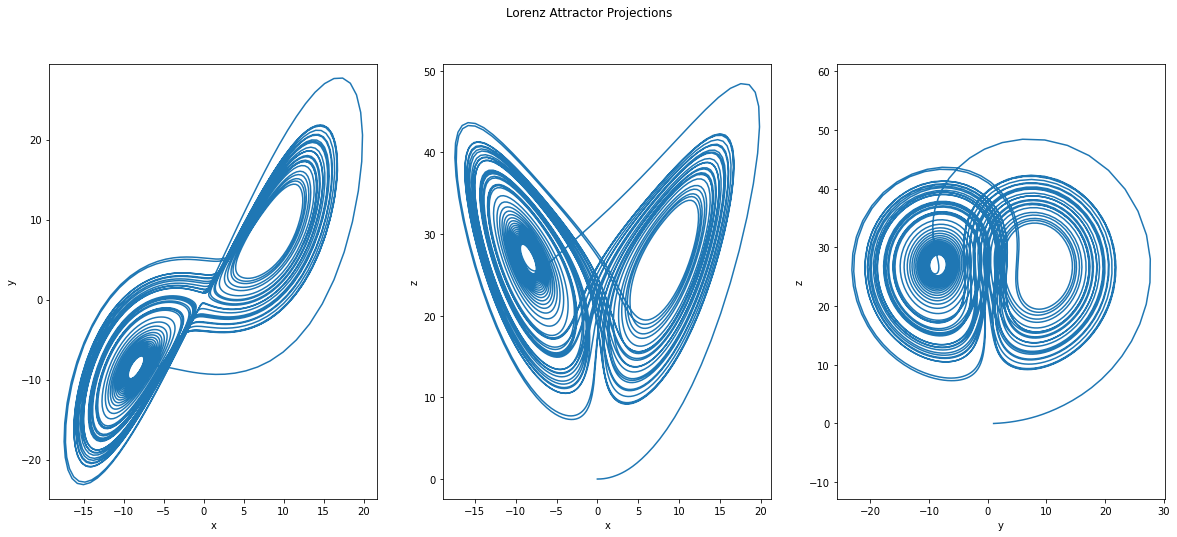

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

var_pairs = [('x', 'y'), ('x', 'z'), ('y', 'z')]

for idx, (var1, var2) in enumerate(var_pairs):
    axs[idx].plot(locals()[var1], locals()[var2])
    axs[idx].axis('equal')
    axs[idx].set_xlabel(var1)
    axs[idx].set_ylabel(var2)

fig.suptitle('Lorenz Attractor Projections')
plt.savefig("figures/lorenz_attractor_projections.png", transparent=True, bbox_inches='tight')
plt.show()

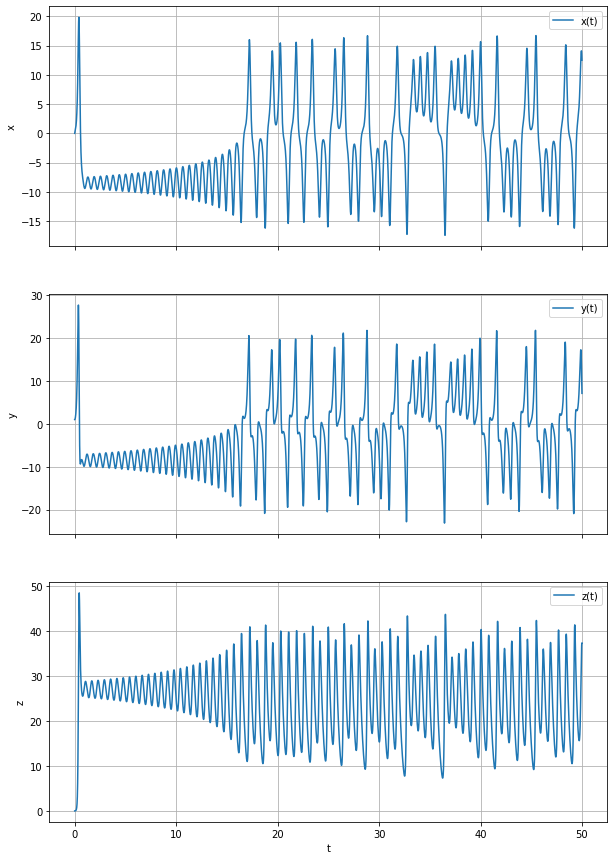

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for idx, var in enumerate(['x', 'y', 'z']):
    axs[idx].plot(time_points, locals()[var], label=f'{var}(t)')
    axs[idx].set_ylabel(var)
    axs[idx].legend()
    axs[idx].grid()

    axs[-1].set_xlabel('t')

plt.savefig("figures/lorenz_attractor_time_series.png", transparent=True, bbox_inches='tight')
plt.show()

# SDIC in Lorenz Attractor

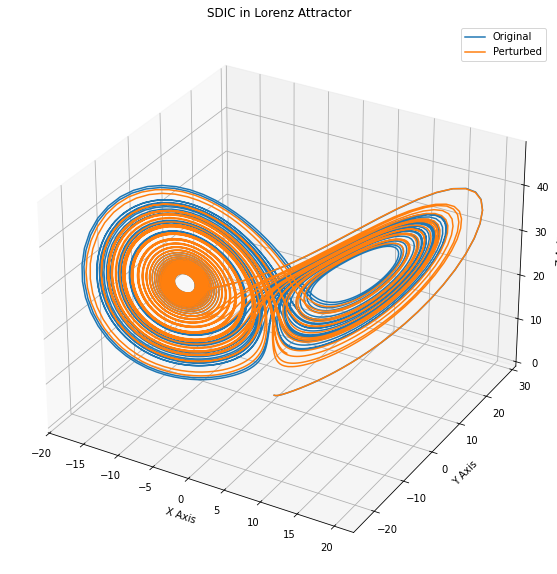

In [28]:
sigma = 10
rho = 28
beta = 8/3
init_state = np.array([0, 1, 0])
delta = np.array([0, 0, 0.01])

time_points = np.linspace(0, 50, 5001)

x1, y1, z1 = simulate_lorenz_system(sigma, rho, beta, init_state, time_points)
x2, y2, z2 = simulate_lorenz_system(sigma, rho, beta, init_state + delta, time_points)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10,10))
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('SDIC in Lorenz Attractor')
ax.plot(x1, y1, z1, label="Original")
ax.plot(x2, y2, z2, label="Perturbed")
ax.legend()
plt.savefig("figures/lorenz_attractor_3d_sdic.png", transparent=True, bbox_inches='tight')
plt.show()

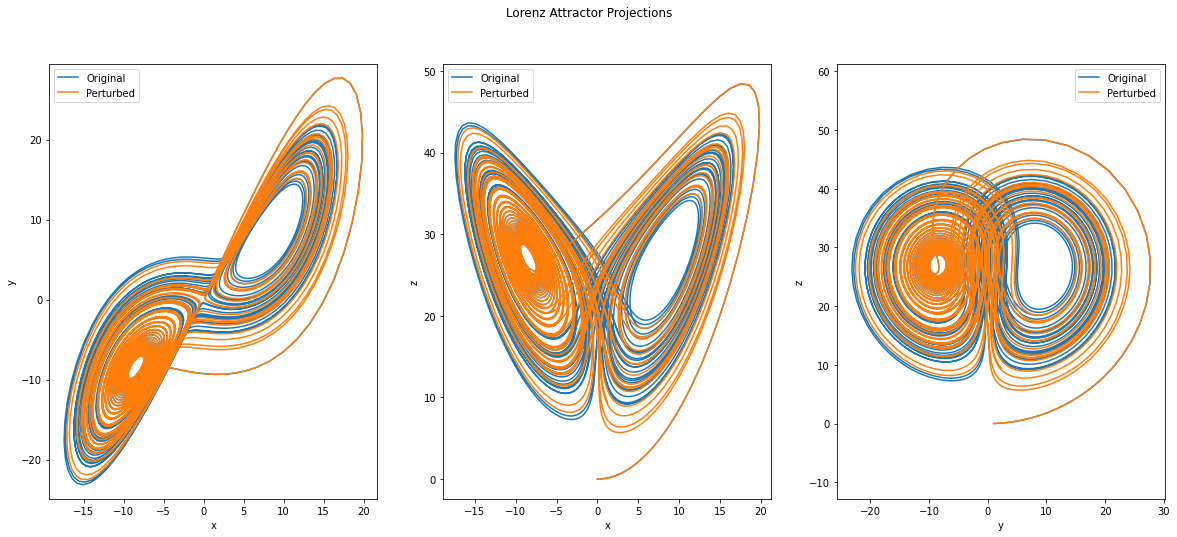

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

var_pairs = [('x', 'y'), ('x', 'z'), ('y', 'z')]

for idx, (var1, var2) in enumerate(var_pairs):
    axs[idx].plot(locals()[var1+'1'], locals()[var2+'1'], label="Original")
    axs[idx].plot(locals()[var1+'2'], locals()[var2+'2'], label="Perturbed")
    axs[idx].axis('equal')
    axs[idx].set_xlabel(var1)
    axs[idx].set_ylabel(var2)
    axs[idx].legend()

fig.suptitle('Lorenz Attractor Projections')
plt.savefig("figures/lorenz_attractor_projections_sdic.png", transparent=True, bbox_inches='tight')
plt.show()

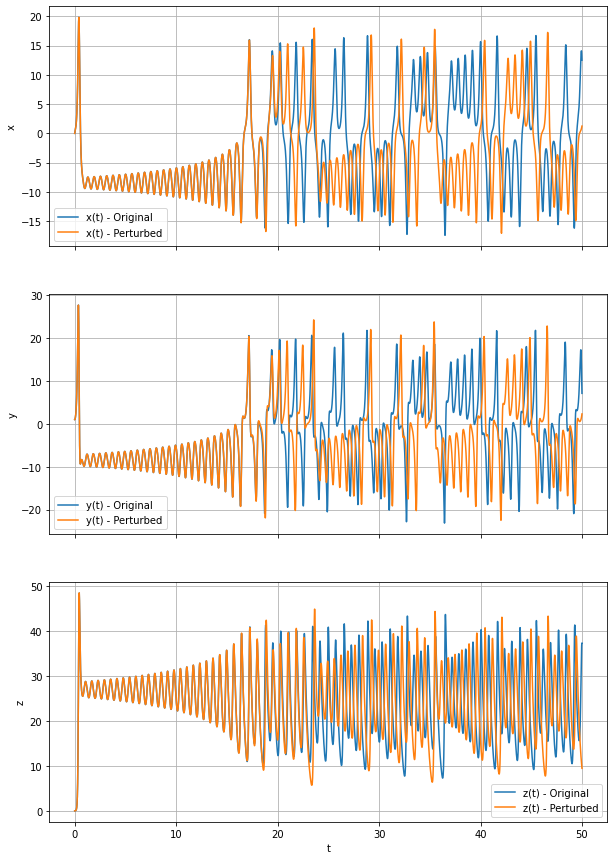

In [30]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for idx, var in enumerate(['x', 'y', 'z']):
    axs[idx].plot(time_points, locals()[var+'1'], label=f'{var}(t) - Original')
    axs[idx].plot(time_points, locals()[var+'2'], label=f'{var}(t) - Perturbed')
    axs[idx].set_ylabel(var)
    axs[idx].legend()
    axs[idx].grid()

    axs[-1].set_xlabel('t')

plt.savefig("figures/lorenz_attractor_time_series_sdic.png", transparent=True, bbox_inches='tight')
plt.show()

# Non-Chaotic Behaviour in Lorenz System

In [31]:
sigma = 10
rho = 20
beta = 8/3

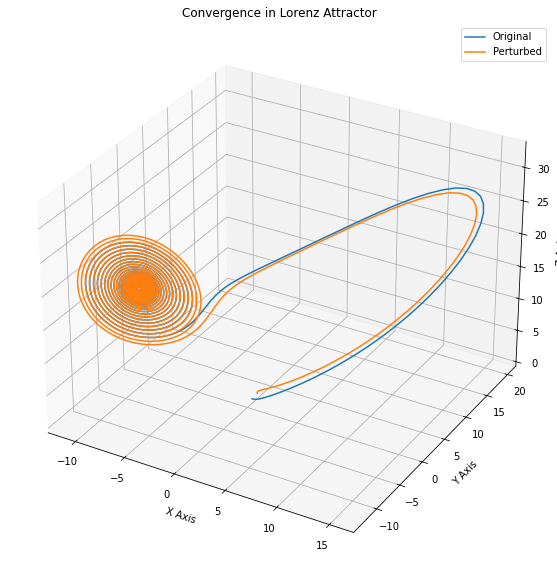

In [32]:
init_state_1 = np.array([0, 1, 0])
init_state_2 = np.array([1, 0, 2])

time_points = np.linspace(0, 50, 5001)

x1, y1, z1 = simulate_lorenz_system(sigma, rho, beta, init_state_1, time_points)
x2, y2, z2 = simulate_lorenz_system(sigma, rho, beta, init_state_2, time_points)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10,10))
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Convergence in Lorenz Attractor')
ax.plot(x1, y1, z1, label="Original")
ax.plot(x2, y2, z2, label="Perturbed")
ax.legend()
plt.savefig("figures/lorenz_attractor_3d_convergence.png", transparent=True, bbox_inches='tight')
plt.show()

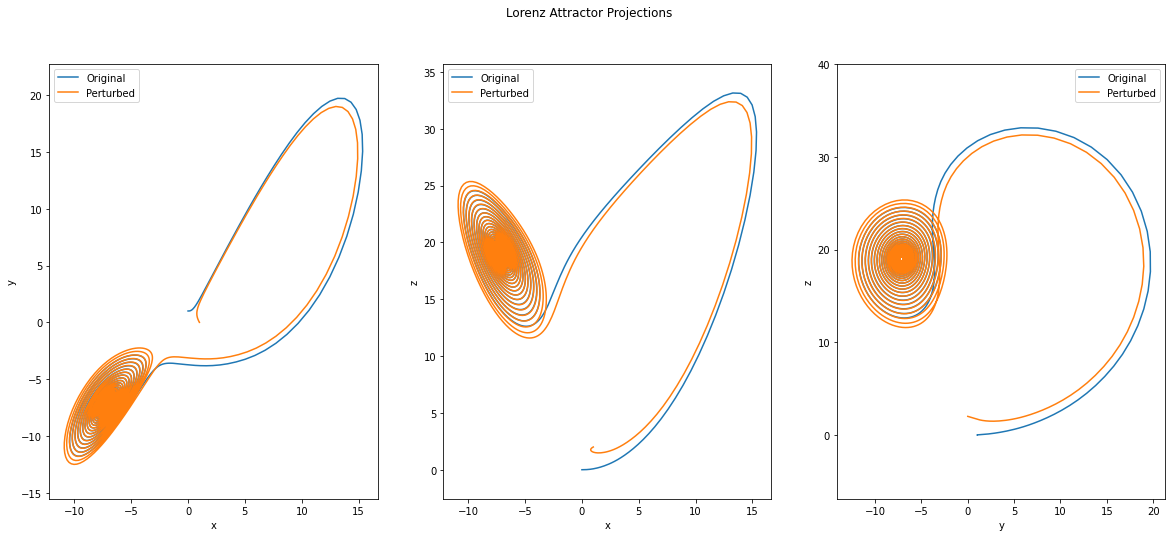

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

var_pairs = [('x', 'y'), ('x', 'z'), ('y', 'z')]

for idx, (var1, var2) in enumerate(var_pairs):
    axs[idx].plot(locals()[var1+'1'], locals()[var2+'1'], label="Original")
    axs[idx].plot(locals()[var1+'2'], locals()[var2+'2'], label="Perturbed")
    axs[idx].axis('equal')
    axs[idx].set_xlabel(var1)
    axs[idx].set_ylabel(var2)
    axs[idx].legend()

fig.suptitle('Lorenz Attractor Projections')
plt.savefig("figures/lorenz_attractor_projections_convergence.png", transparent=True, bbox_inches='tight')
plt.show()

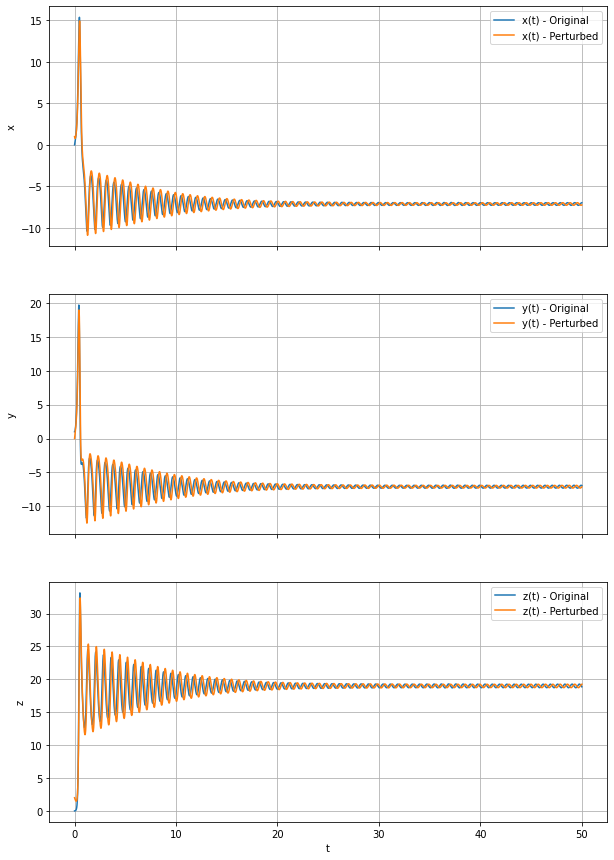

In [34]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for idx, var in enumerate(['x', 'y', 'z']):
    axs[idx].plot(time_points, locals()[var+'1'], label=f'{var}(t) - Original')
    axs[idx].plot(time_points, locals()[var+'2'], label=f'{var}(t) - Perturbed')
    axs[idx].set_ylabel(var)
    axs[idx].legend()
    axs[idx].grid()

    axs[-1].set_xlabel('t')

plt.savefig("figures/lorenz_attractor_time_series_convergence.png", transparent=True, bbox_inches='tight')
plt.show()

# Exponential Divergence Behaviour

In [35]:
sigma = 10
rho = 28
beta = 8/3
init_state = np.array([0, 1, 0])
delta = np.array([0, 1e-15, 0])

time_points = np.linspace(0, 0.8, 1001)

x1, y1, z1 = simulate_lorenz_system(sigma, rho, beta, init_state, time_points)
x2, y2, z2 = simulate_lorenz_system(sigma, rho, beta, init_state + delta, time_points)

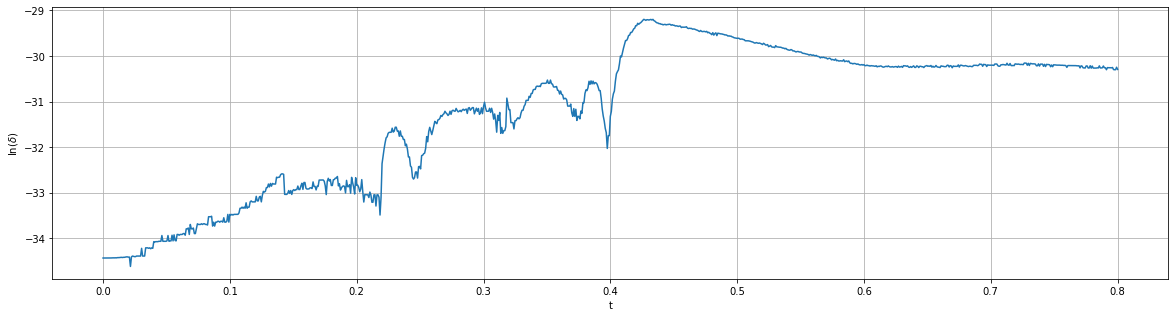

In [36]:
deltas = np.linalg.norm(np.array([x1, y1, z1]) - np.array([x2, y2, z2]), axis=0)
log_deltas = np.log(deltas)

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(time_points, log_deltas)
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel(r'$\ln(\delta)$')
plt.savefig("figures/lorenz_attractor_lyapunov.png", transparent=True, bbox_inches='tight')
plt.show()

# X-Coupled Lorenz Attractors

In [37]:
def simulate_x_coupled_lorenz_system(sigmas, rhos, betas, coupling_constants, init_states, time_points):
    def x_coupled_lorenz_system(t, states, sigmas, rhos, betas, coupling_constants):
        x1, y1, z1, x2, y2, z2 = states
        d_vec = [
            sigmas[0] * (y1 - x1) + coupling_constants[0] * (x2 - x1),
            x1 * (rhos[0] - z1) - y1,
            x1 * y1 - betas[0] * z1,
            sigmas[1] * (y2 - x2) + coupling_constants[1] * (x1 - x2),
            x2 * (rhos[1] - z2) - y2,
            x2 * y2 - betas[1] * z2
        ]
        return d_vec
    
    init_states = np.concatenate(init_states)
    sol = solve_ivp(x_coupled_lorenz_system, [time_points[0], time_points[-1]], init_states, args=(sigmas, rhos, betas, coupling_constants), t_eval=time_points)
    x1, y1, z1, x2, y2, z2 = sol.y
    return x1, y1, z1, x2, y2, z2

## Unidirectional Coupling

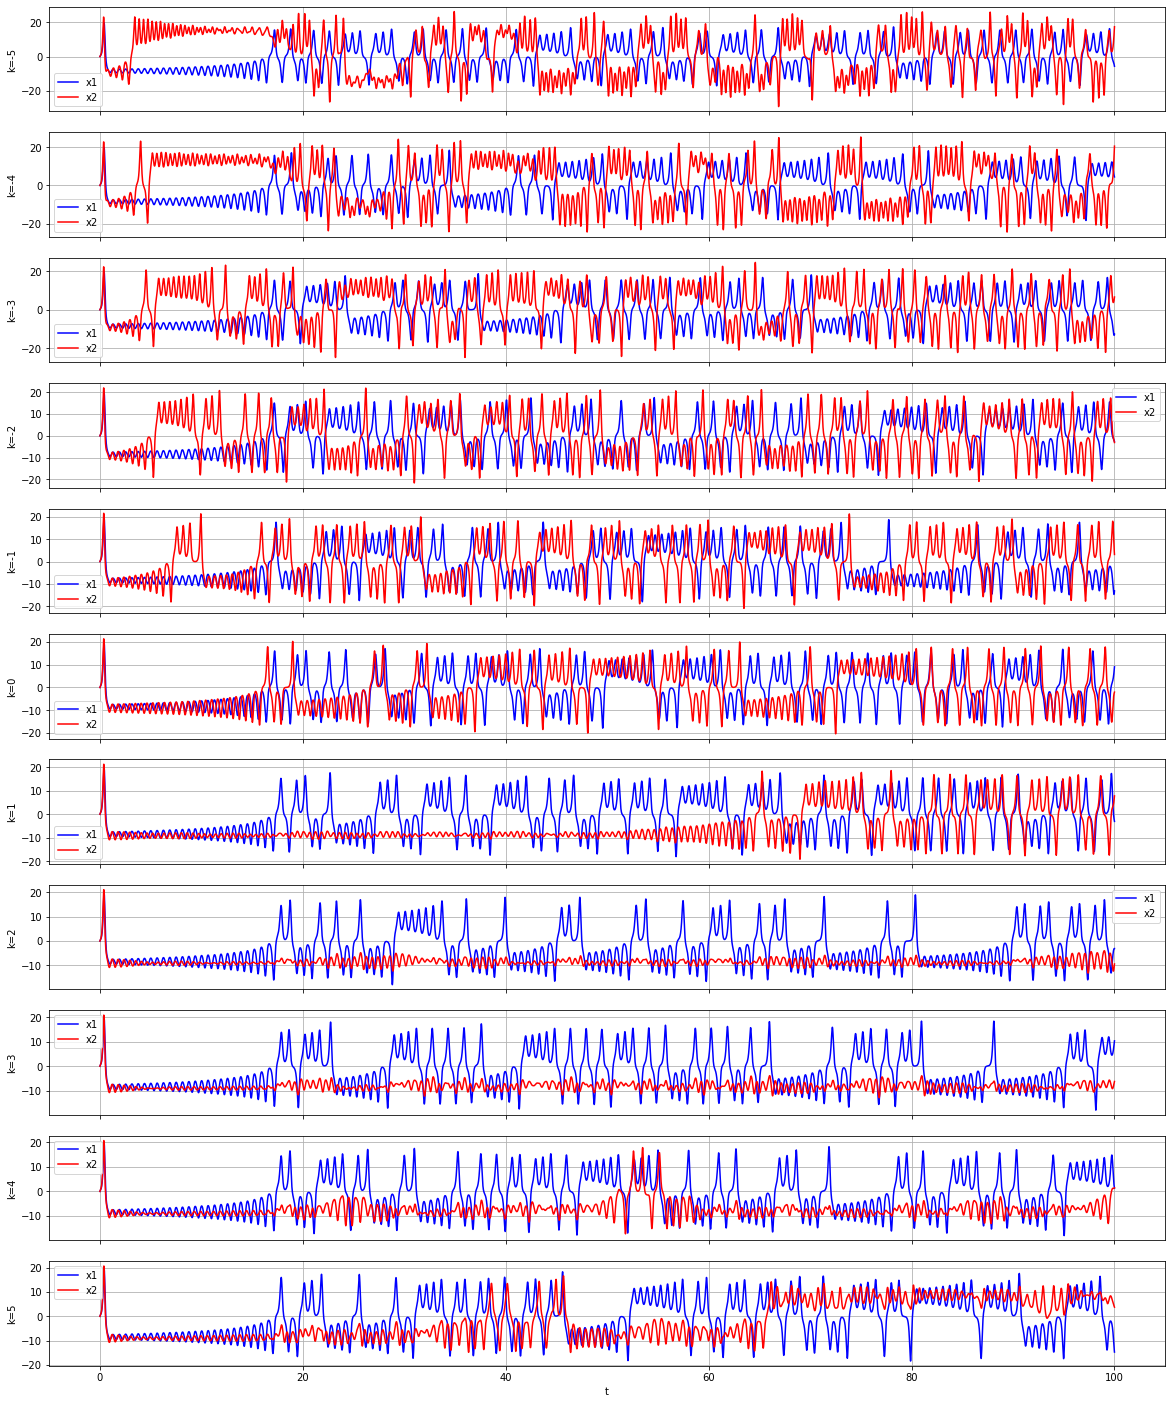

In [38]:
sigmas = [10, 12]
rhos = [28, 29]
betas = [8/3, 9/3]
init_state = [0, 1, 0]
time_points = np.linspace(0, 100, 10001)

fig, axs = plt.subplots(11, 1, figsize=(20, 25), sharex=True)

for idx, k in enumerate(range(-5, 6)):
    coupling_constants = [0, k]
    x1, y1, z1, x2, y2, z2 = simulate_x_coupled_lorenz_system(sigmas, rhos, betas, coupling_constants, [init_state, init_state], time_points)
    
    axs[idx].plot(time_points, x1, label='x1', color='blue')
    axs[idx].plot(time_points, x2, label='x2', color='red')
    axs[idx].set_ylabel(f'k={k}')
    axs[idx].legend()
    axs[idx].grid()

axs[-1].set_xlabel('t')
plt.savefig("figures/x_unicoupled_lorenz_system_time_series.png", transparent=True, bbox_inches='tight')
plt.show()

## Bidirectional Symmetric Coupling

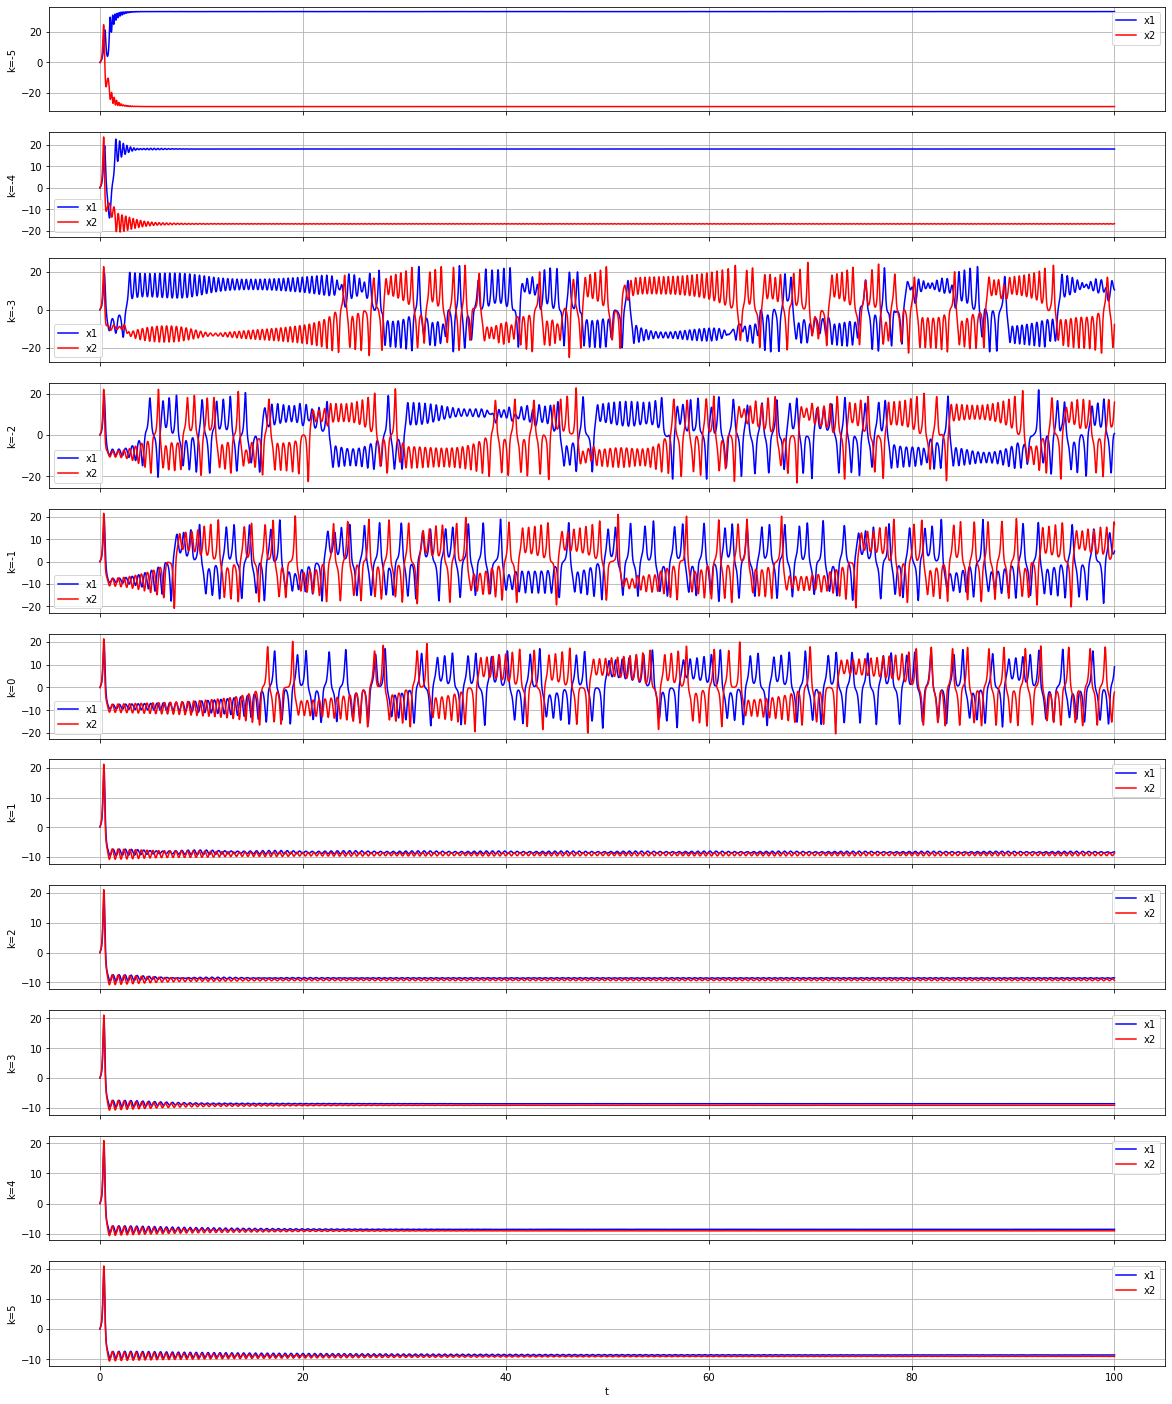

In [39]:
sigmas = [10, 12]
rhos = [28, 29]
betas = [8/3, 9/3]
init_state = [0, 1, 0]
time_points = np.linspace(0, 100, 10001)

fig, axs = plt.subplots(11, 1, figsize=(20, 25), sharex=True)

for idx, k in enumerate(range(-5, 6)):
    coupling_constants = [k, k]
    x1, y1, z1, x2, y2, z2 = simulate_x_coupled_lorenz_system(sigmas, rhos, betas, coupling_constants, [init_state, init_state], time_points)
    
    axs[idx].plot(time_points, x1, label='x1', color='blue')
    axs[idx].plot(time_points, x2, label='x2', color='red')
    axs[idx].set_ylabel(f'k={k}')
    axs[idx].legend()
    axs[idx].grid()

axs[-1].set_xlabel('t')
plt.savefig("figures/x_bicoupled_lorenz_system_time_series.png", transparent=True, bbox_inches='tight'  )
plt.show()

# Y-Coupled Lorenz Attractors

In [42]:
def simulate_y_coupled_lorenz_system(sigmas, rhos, betas, coupling_constants, init_states, time_points):
    def y_coupled_lorenz_system(t, states, sigmas, rhos, betas, coupling_constants):
        x1, y1, z1, x2, y2, z2 = states
        d_vec = [
            sigmas[0] * (y1 - x1),
            x1 * (rhos[0] - z1) - y1 + coupling_constants[0] * (y2 - y1),
            x1 * y1 - betas[0] * z1,
            sigmas[1] * (y2 - x2),
            x2 * (rhos[1] - z2) - y2 + coupling_constants[1] * (y1 - y2),
            x2 * y2 - betas[1] * z2
        ]
        return d_vec
    
    init_states = np.concatenate(init_states)
    sol = solve_ivp(y_coupled_lorenz_system, [time_points[0], time_points[-1]], init_states, args=(sigmas, rhos, betas, coupling_constants), t_eval=time_points)
    x1, y1, z1, x2, y2, z2 = sol.y
    return x1, y1, z1, x2, y2, z2

## Unidirectional Coupling

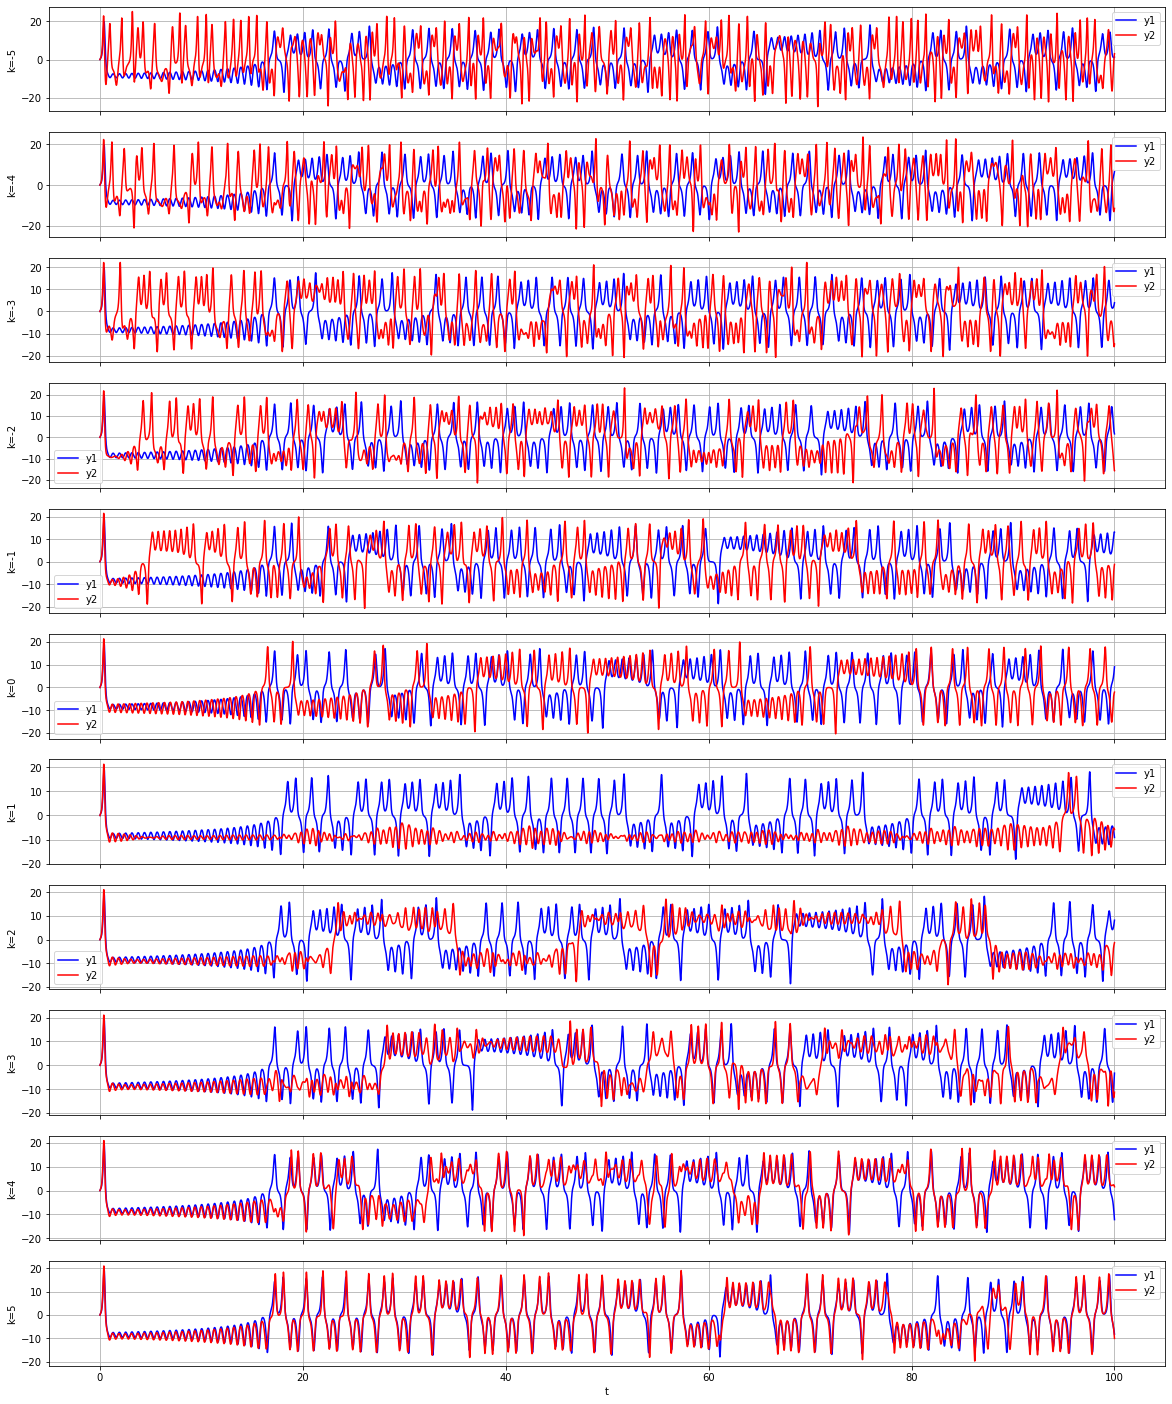

In [43]:
sigmas = [10, 12]
rhos = [28, 29]
betas = [8/3, 9/3]
init_state = [0, 1, 0]
time_points = np.linspace(0, 100, 10001)

fig, axs = plt.subplots(11, 1, figsize=(20, 25), sharex=True)

for idx, k in enumerate(range(-5, 6)):
    coupling_constants = [0, k]
    x1, y1, z1, x2, y2, z2 = simulate_y_coupled_lorenz_system(sigmas, rhos, betas, coupling_constants, [init_state, init_state], time_points)
    
    axs[idx].plot(time_points, x1, label='y1', color='blue')
    axs[idx].plot(time_points, x2, label='y2', color='red')
    axs[idx].set_ylabel(f'k={k}')
    axs[idx].legend()
    axs[idx].grid()

axs[-1].set_xlabel('t')
plt.savefig("figures/y_unicoupled_lorenz_system_time_series.png", transparent=True, bbox_inches='tight')
plt.show()

## Bidirectional Symmetric Coupling

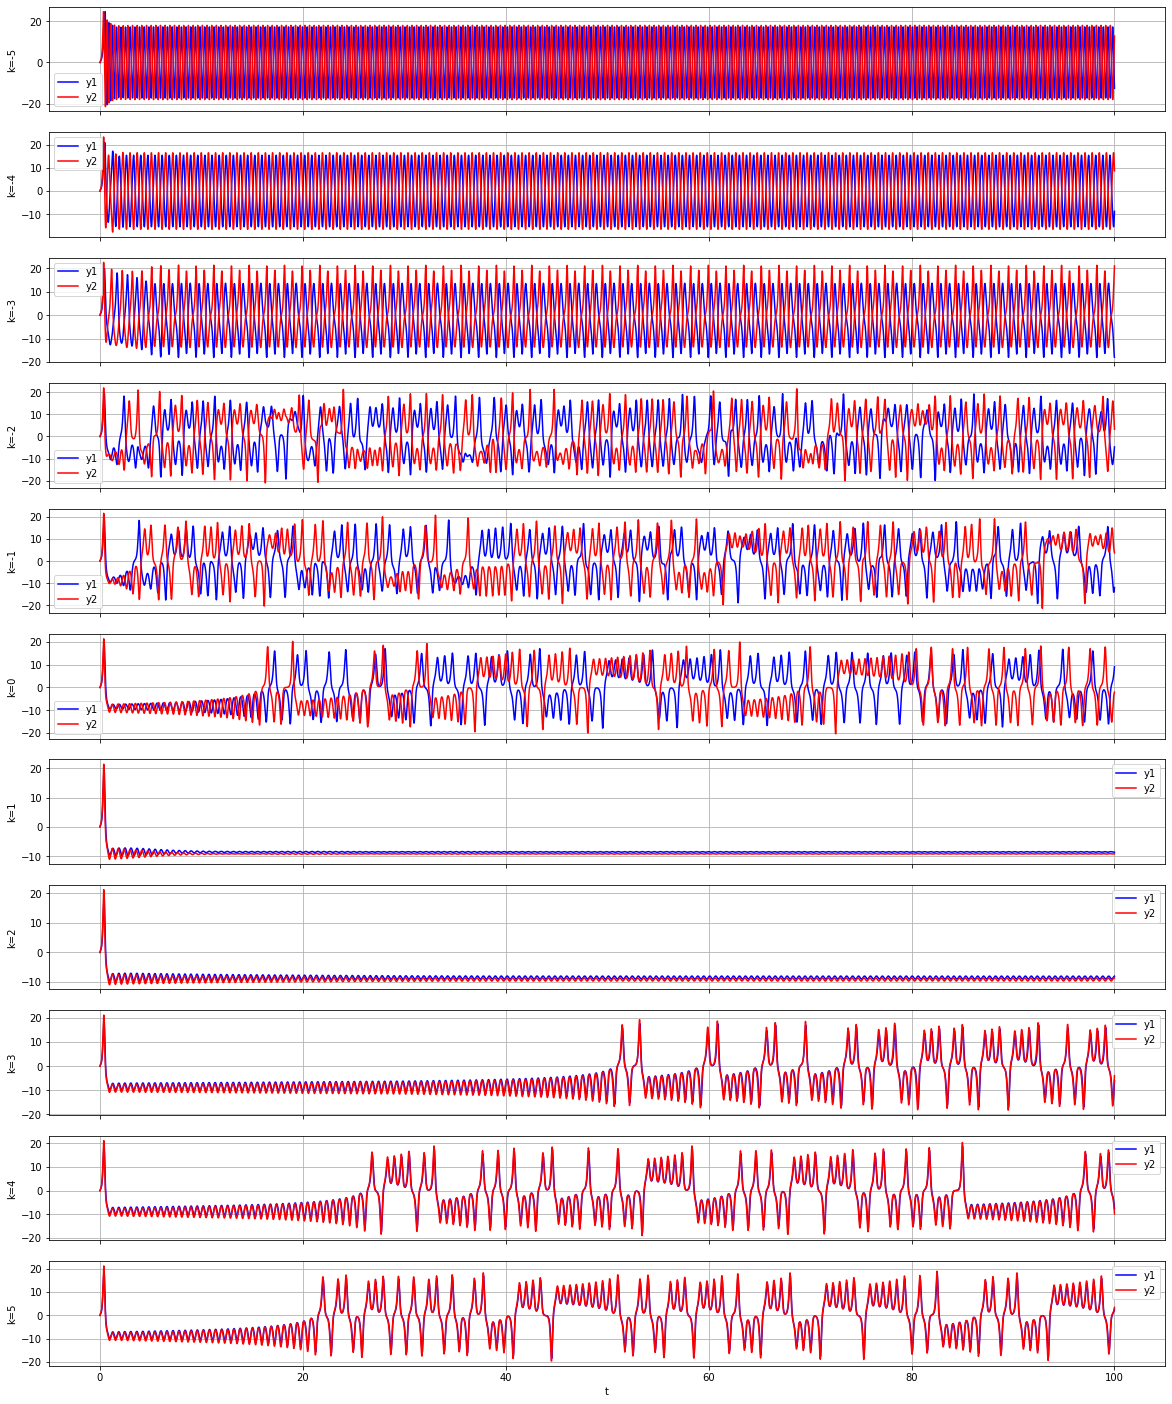

In [ ]:
sigmas = [10, 12]
rhos = [28, 29]
betas = [8/3, 9/3]
init_state = [0, 1, 0]
time_points = np.linspace(0, 100, 10001)

fig, axs = plt.subplots(11, 1, figsize=(20, 25), sharex=True)

for idx, k in enumerate(range(-5, 6)):
    coupling_constants = [k, k]
    x1, y1, z1, x2, y2, z2 = simulate_y_coupled_lorenz_system(sigmas, rhos, betas, coupling_constants, [init_state, init_state], time_points)
    
    axs[idx].plot(time_points, x1, label='y1', color='blue')
    axs[idx].plot(time_points, x2, label='y2', color='red')
    axs[idx].set_ylabel(f'k={k}')
    axs[idx].legend()
    axs[idx].grid()

axs[-1].set_xlabel('t')
plt.savefig("figures/y_bicoupled_lorenz_system_time_series.png", transparent=True, bbox_inches='tight')
plt.show()

# Z-Coupled Lorenz Attractors

In [45]:
def simulate_z_coupled_lorenz_system(sigmas, rhos, betas, coupling_constants, init_states, time_points):
    def z_coupled_lorenz_system(t, states, sigmas, rhos, betas, coupling_constants):
        x1, y1, z1, x2, y2, z2 = states
        d_vec = [
            sigmas[0] * (y1 - x1),
            x1 * (rhos[0] - z1) - y1,
            x1 * y1 - betas[0] * z1 + coupling_constants[0] * (z2 - z1),
            sigmas[1] * (y2 - x2),
            x2 * (rhos[1] - z2) - y2,
            x2 * y2 - betas[1] * z2 + coupling_constants[1] * (z1 - z2)
        ]
        return d_vec
    
    init_states = np.concatenate(init_states)
    sol = solve_ivp(z_coupled_lorenz_system, [time_points[0], time_points[-1]], init_states, args=(sigmas, rhos, betas, coupling_constants), t_eval=time_points)
    x1, y1, z1, x2, y2, z2 = sol.y
    return x1, y1, z1, x2, y2, z2

## Unidirectional Coupling

KeyboardInterrupt: 

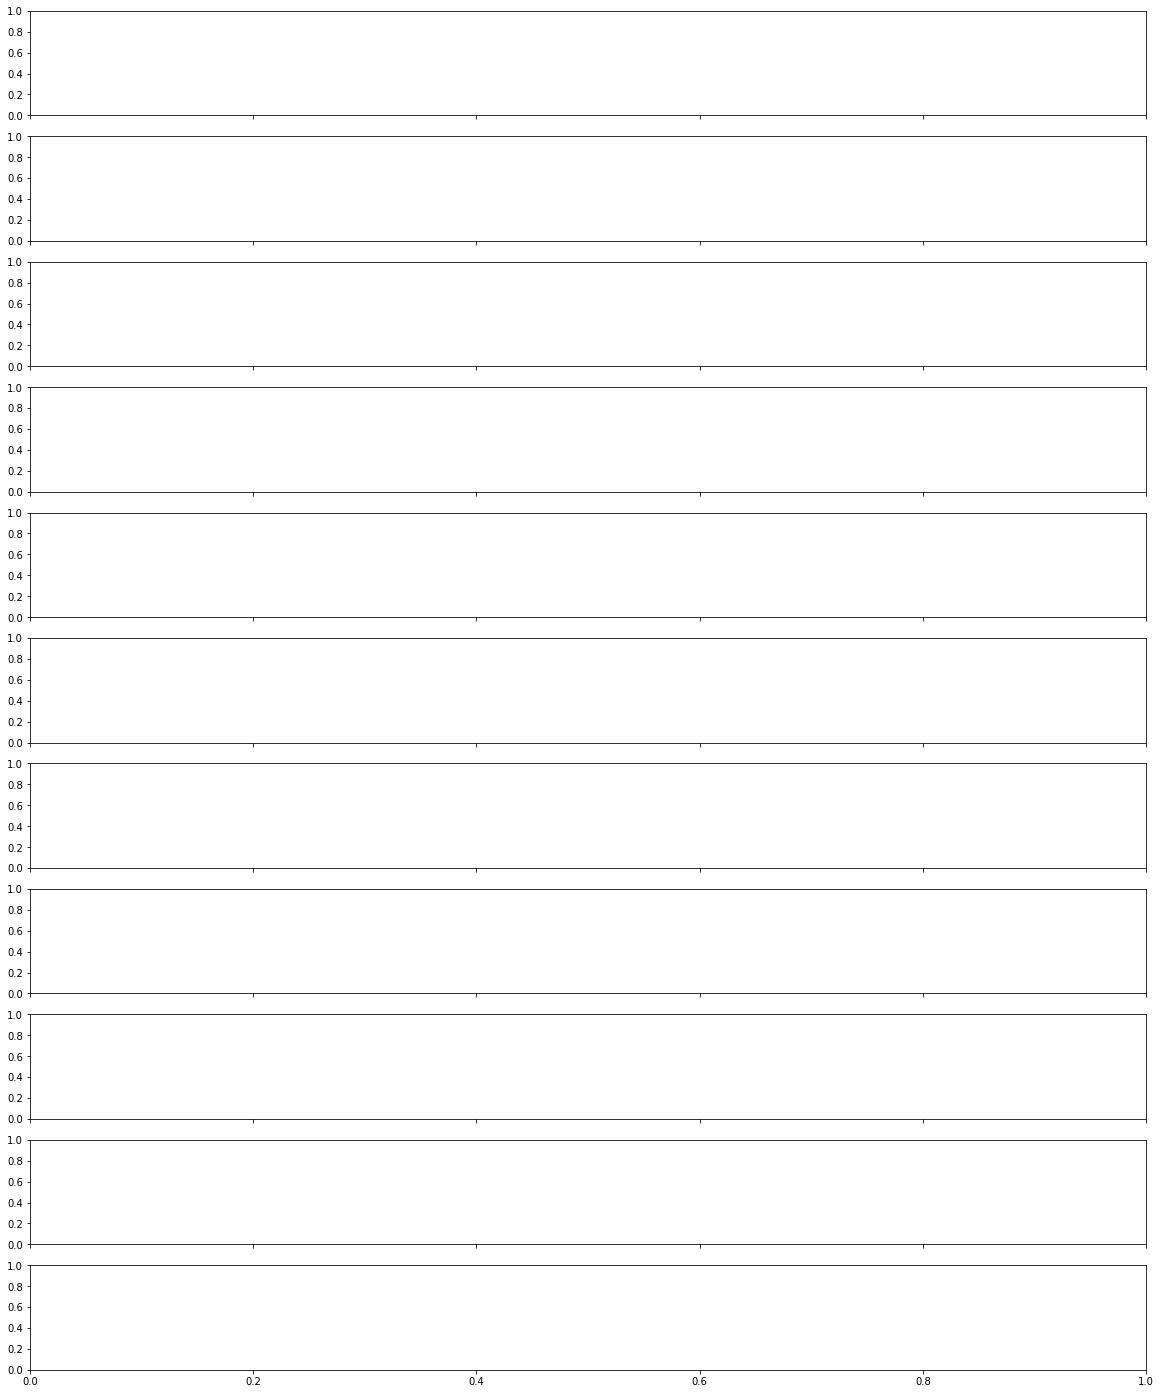

In [47]:
sigmas = [10, 12]
rhos = [28, 29]
betas = [8/3, 9/3]
init_state = [0, 1, 0]
time_points = np.linspace(0, 100, 10001)

fig, axs = plt.subplots(11, 1, figsize=(20, 25), sharex=True)

for idx, k in enumerate(range(-5, 6)):
    coupling_constants = [0, k]
    x1, y1, z1, x2, y2, z2 = simulate_z_coupled_lorenz_system(sigmas, rhos, betas, coupling_constants, [init_state, init_state], time_points)
    
    axs[idx].plot(time_points, x1, label='z1', color='blue')
    axs[idx].plot(time_points, x2, label='z2', color='red')
    axs[idx].set_ylabel(f'k={k}')
    axs[idx].legend()
    axs[idx].grid()

axs[-1].set_xlabel('t')
plt.savefig("figures/z_unicoupled_lorenz_system_time_series.png", transparent=True, bbox_inches='tight')
plt.show()

## Bidirectional Symmetric Coupling

KeyboardInterrupt: 

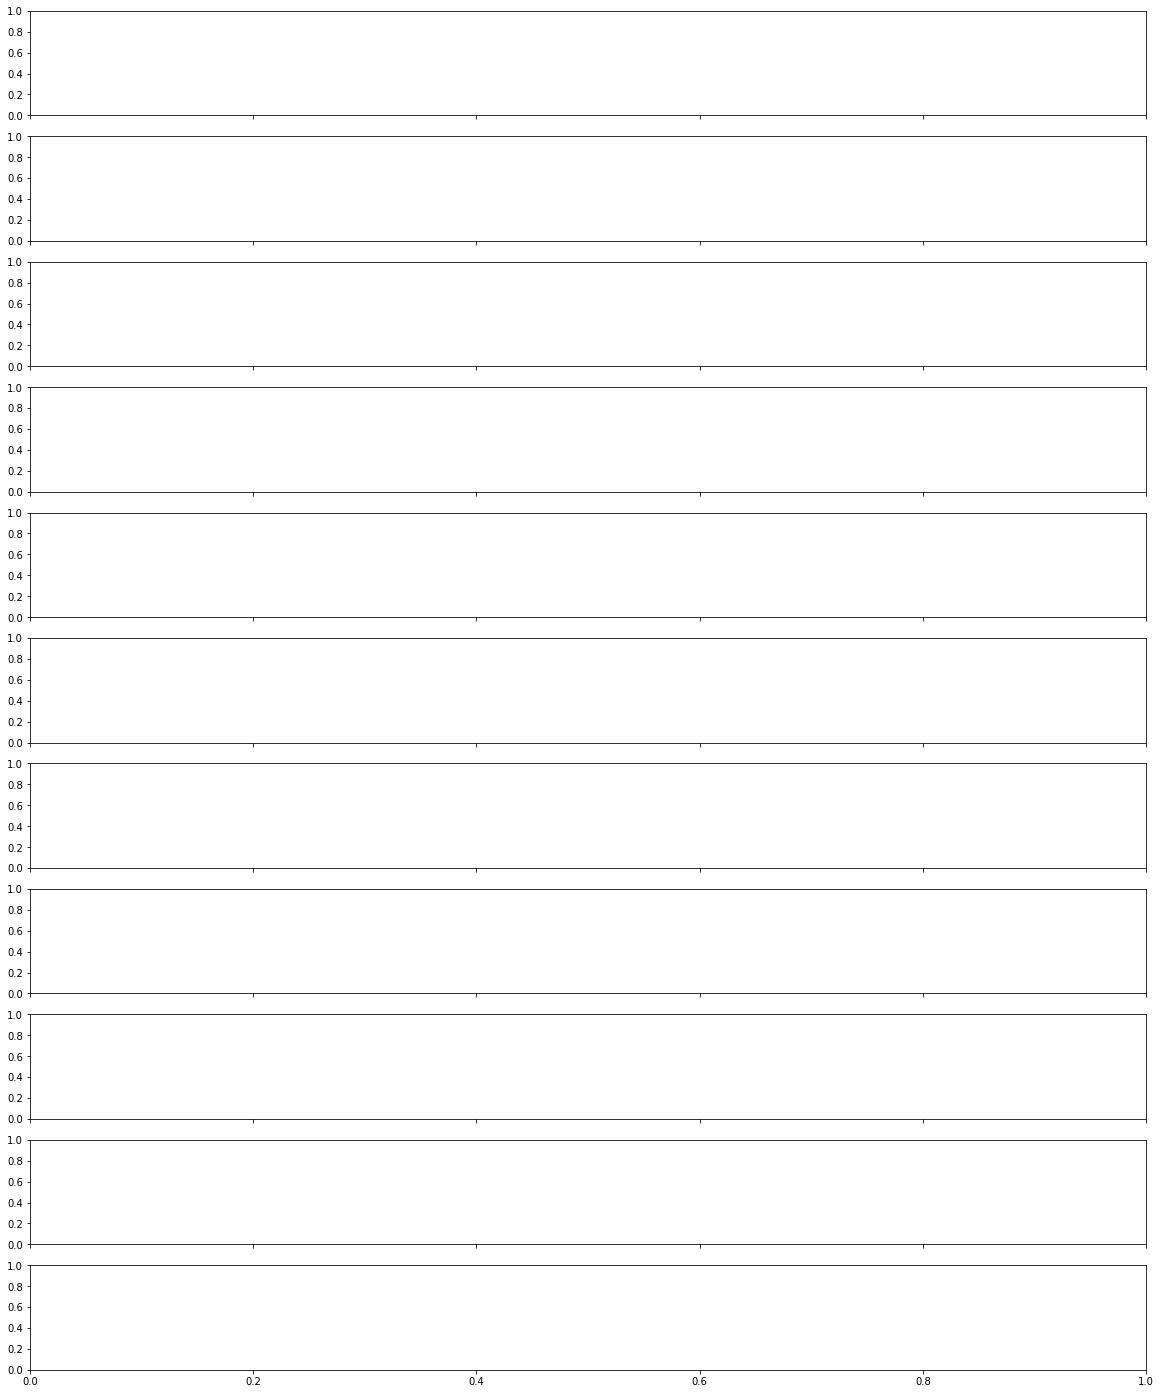

In [48]:
sigmas = [10, 12]
rhos = [28, 29]
betas = [8/3, 9/3]
init_state = [0, 1, 0]
time_points = np.linspace(0, 100, 10001)

fig, axs = plt.subplots(11, 1, figsize=(20, 25), sharex=True)

for idx, k in enumerate(range(-5, 6)):
    coupling_constants = [k, k]
    x1, y1, z1, x2, y2, z2 = simulate_z_coupled_lorenz_system(sigmas, rhos, betas, coupling_constants, [init_state, init_state], time_points)
    
    axs[idx].plot(time_points, x1, label='z1', color='blue')
    axs[idx].plot(time_points, x2, label='z2', color='red')
    axs[idx].set_ylabel(f'k={k}')
    axs[idx].legend()
    axs[idx].grid()

axs[-1].set_xlabel('t')
plt.savefig("figures/z_bicoupled_lorenz_system_time_series.png", transparent=True, bbox_inches='tight')
plt.show()

# Delay Embedding Reconstruction of Lorenz Attractor

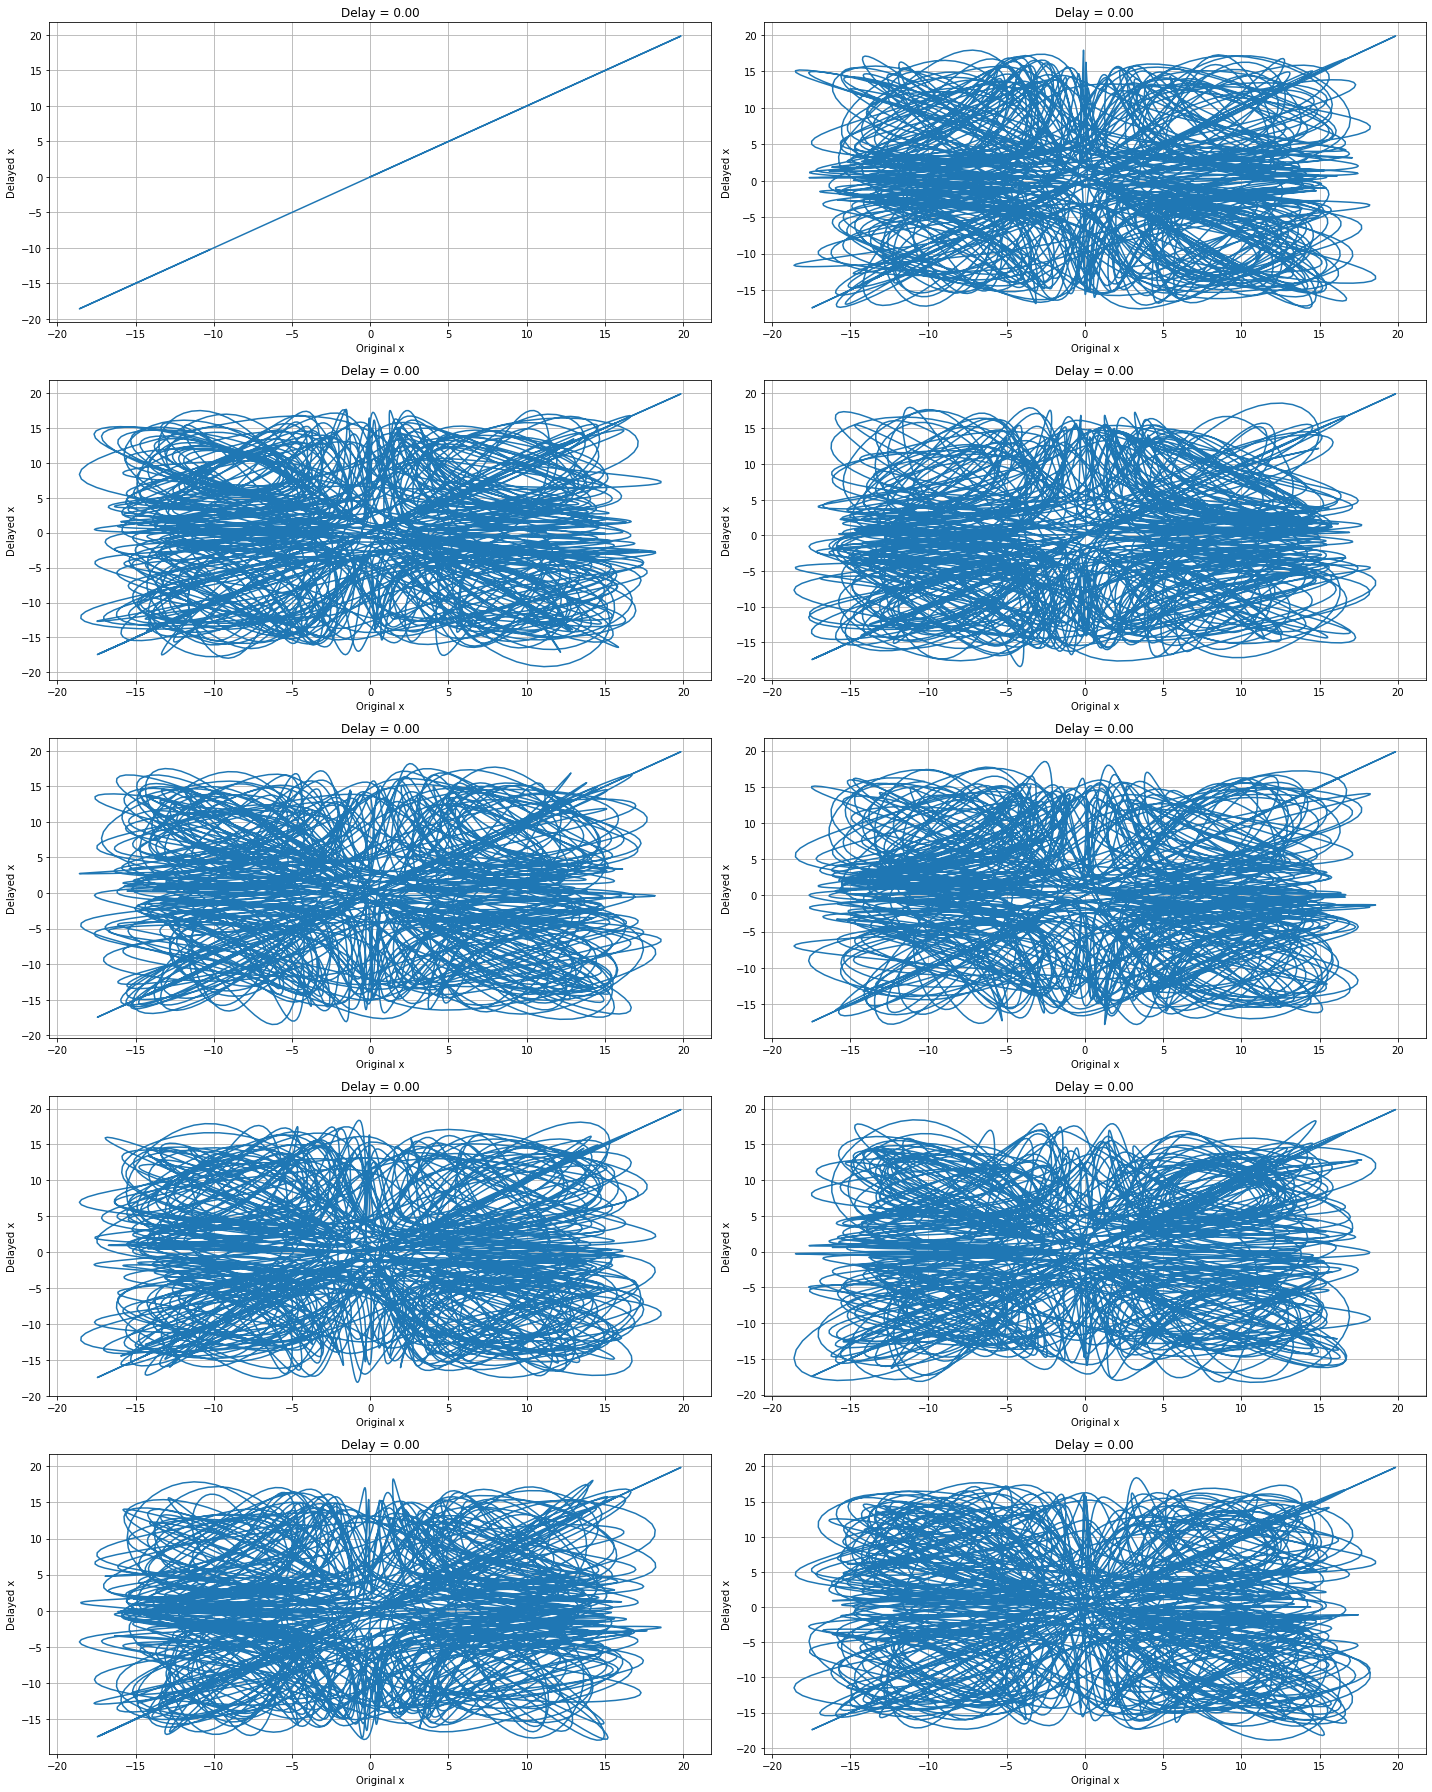

In [40]:
sigma = 10
rho = 28
beta = 8/3
init_state = [0, 1, 0]
time_points = np.linspace(0, 200, 20001)

x, _, _ = simulate_lorenz_system(sigma, rho, beta, init_state, time_points)

delay_max = 0.001
delays = np.linspace(0, delay_max, 10)
fig, axs = plt.subplots(5, 2, figsize=(20, 25))

for idx, delay in enumerate(delays):
    new_time_points = np.linspace(delay, 200 + delay, 20001)
    dx, _, _ = simulate_lorenz_system(sigma, rho, beta, init_state, new_time_points)
    
    ax = axs[idx // 2, idx % 2]
    ax.plot(x, dx)
    ax.set_title(f'Delay = {delay:.2f}')
    ax.set_xlabel('Original x')
    ax.set_ylabel('Delayed x')
    ax.grid()

plt.tight_layout()
plt.show()


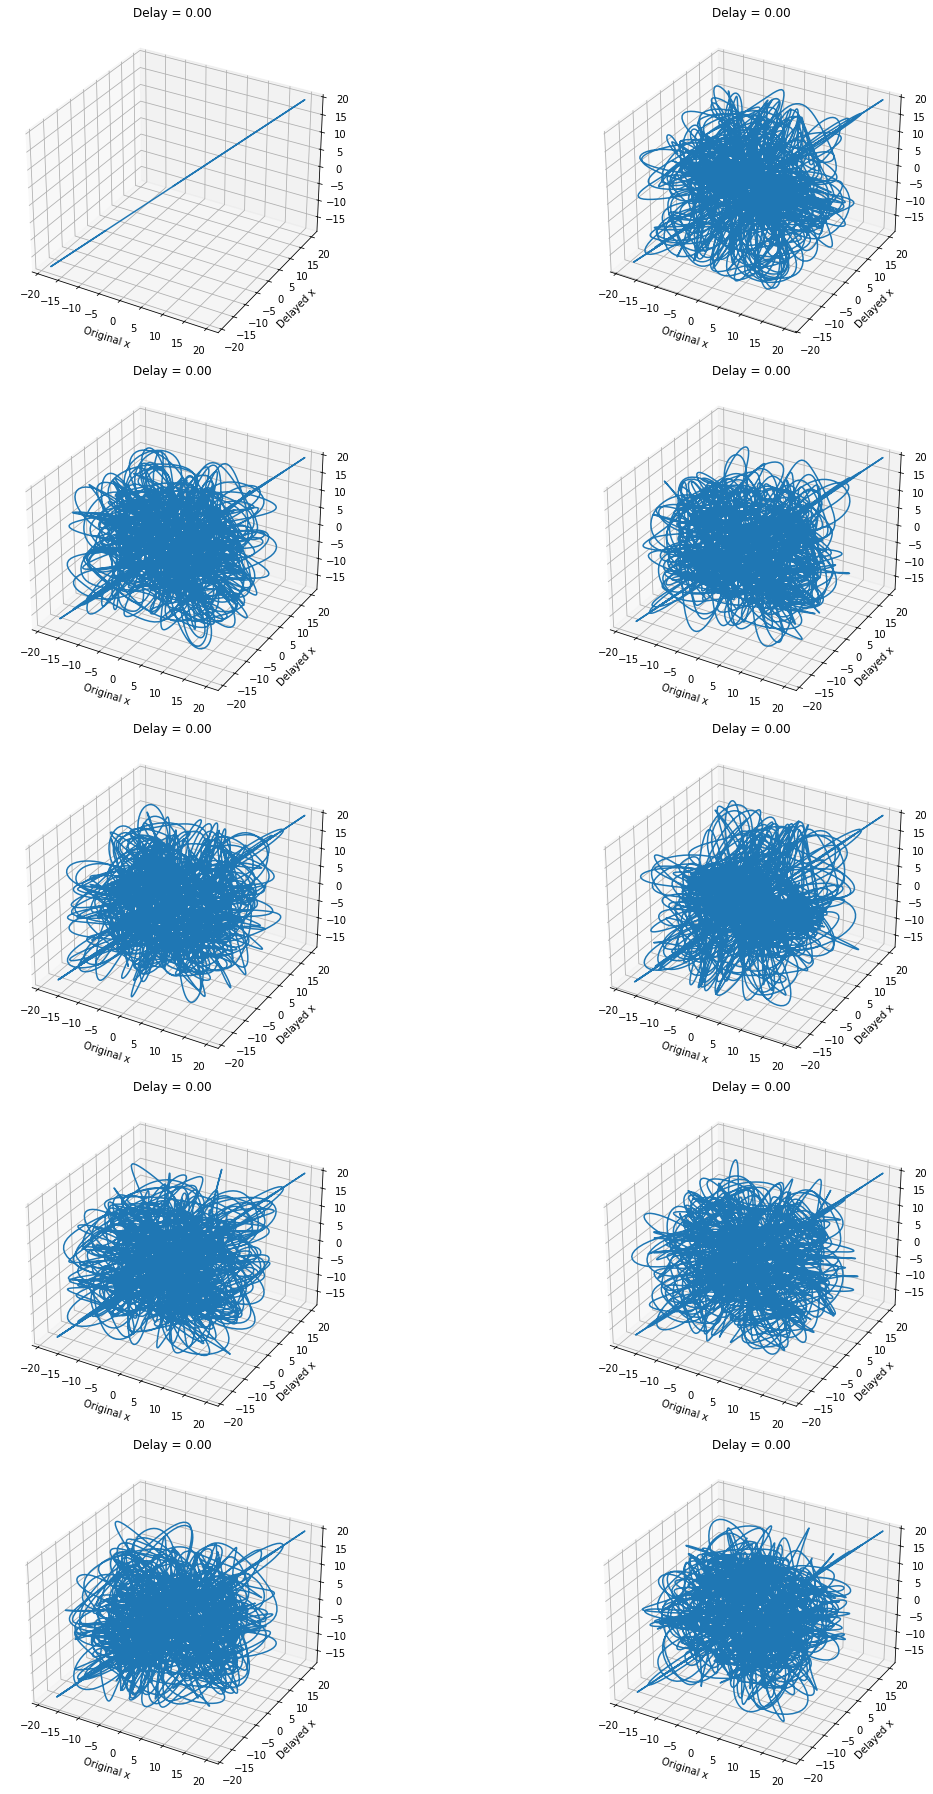

In [41]:
sigma = 10
rho = 28
beta = 8/3
init_state = [0, 1, 0]
time_points = np.linspace(0, 200, 20001)

x, _, _ = simulate_lorenz_system(sigma, rho, beta, init_state, time_points)

delay_max = 0.001
delays = np.linspace(0, delay_max, 10)
fig, axs = plt.subplots(5, 2, subplot_kw={'projection': '3d'}, figsize=(20, 25))

for idx, delay in enumerate(delays):
    new_time_points_1 = np.linspace(delay, 200 + delay, 20001)
    new_time_points_2 = np.linspace(2*delay, 200 + 2*delay, 20001)
    dx, _, _ = simulate_lorenz_system(sigma, rho, beta, init_state, new_time_points_1)
    ddx, _, _ = simulate_lorenz_system(sigma, rho, beta, init_state, new_time_points_2)
    
    ax = axs[idx // 2, idx % 2]
    ax.plot(x, dx, ddx)
    ax.set_title(f'Delay = {delay:.2f}')
    ax.set_xlabel('Original x')
    ax.set_ylabel('Delayed x')
    ax.grid()

plt.tight_layout()
plt.show()
